In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np


In [2]:
columns = ["ID", "age", "sex", "education", "country", "ethinicity", "Nscore", "Escore",
           "Oscore", "Ascore", "Cscore", "impulsive", "SS", "alcohol", "amphet", "amyl",
           "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
           "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine", "semer", "VSA"]

df_drug = pd.read_csv("drug_consumption.data", names=columns)
df_drug.head()

,ID,age,sex,education,country,ethinicity,Nscore,Escore,Oscore,Ascore,...,ecstasy,heroin,ketamine,legalh,LSD,meth,mushrooms,nicotine,semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
df_drug

,ID,age,sex,education,country,ethinicity,Nscore,Escore,Oscore,Ascore,...,ecstasy,heroin,ketamine,legalh,LSD,meth,mushrooms,nicotine,semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
# set female to 0, male to 1
df_drug['sex'] = df_drug['sex'].mask(
    df_drug['sex'] == 0.48246, 0).mask(df_drug['sex'] == -0.48246, 1)

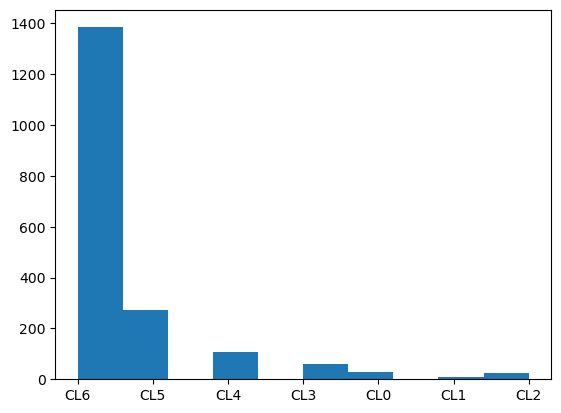

In [5]:
# Set the order you prefer for the x-axis labels
order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]
# Create a histogram with Matplotlib
plt.hist(df_drug["caff"])

# Set the x-axis labels and their order


# Show the plot
plt.show()


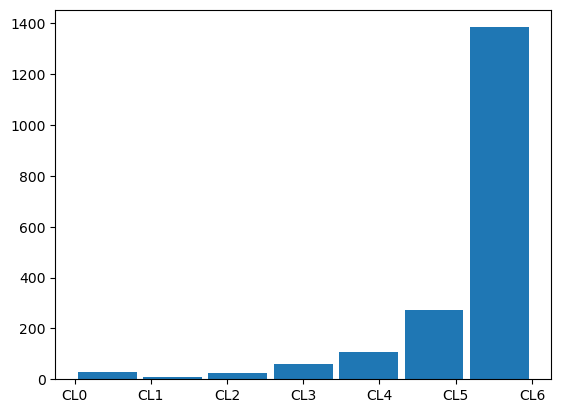

In [6]:
def create_hist(col, df_drug):
    # data = ['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3', 'CL0', 'CL3', 'CL1']

    # Create a DataFrame
    # df = pd.DataFrame({'class': data})

    # Set the order you prefer for the x-axis labels
    order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

    # Sort the DataFrame based on the desired order
    df_drug[col] = pd.Categorical(
        df_drug[col], categories=order, ordered=True)
    df_drug = df_drug.sort_values(by=col)

    # Create a histogram with Matplotlib
    plt.hist(df_drug[col], bins=len(order), rwidth=0.9)

    # Set the x-axis labels
    plt.xticks(range(len(order)), order)

    # Show the plot
    plt.show()


create_hist("caff", df_drug)


In [7]:
ls_drugs = ["alcohol", "amphet", "amyl",
            "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
            "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine",  "VSA"]

all_drugs =  ["alcohol", "amphet", "amyl",
            "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
            "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine","semer", "VSA"]

In [8]:
ls_drugs

['alcohol',
 'amphet',
 'amyl',
 'benzos',
 'caff',
 'cannabis',
 'chocolate',
 'cocaine',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legalh',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine',
 'VSA']

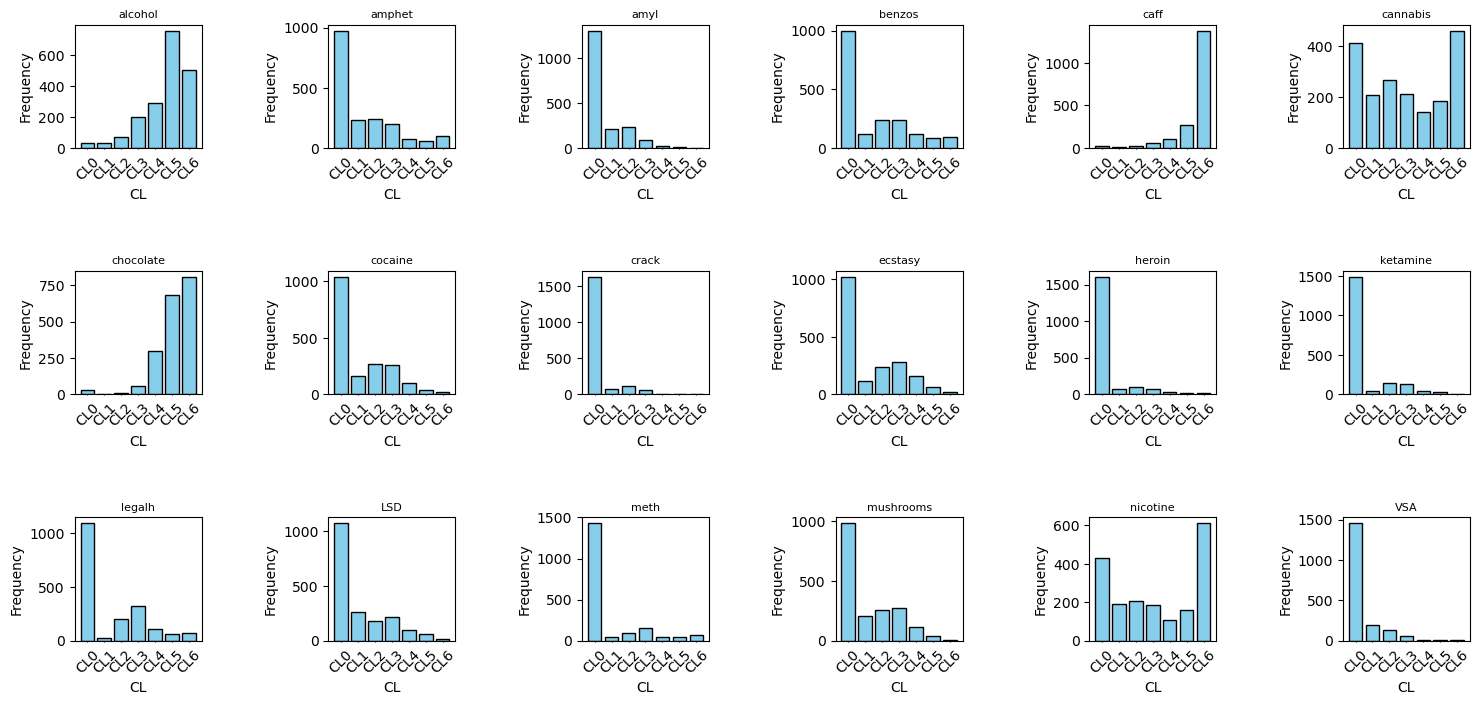

In [9]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 50, 51)
order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

# Create a figure with a grid of subplots (3 rows and 6 columns)
fig, axes = plt.subplots(3, 6, figsize=(18, 8))  # Adjust the height of the figure

# Iterate through drugs and their corresponding subplots
for idx, drug in enumerate(ls_drugs):
    row = idx // 6
    col = idx % 6

    # Select the subplot
    ax = axes[row, col]

    # Calculate the frequency of each "CL" category for the current drug
    drug_counts = df_drug[drug].value_counts().reindex(order, fill_value=0)

    # Plot a bar chart showing the frequency of each "CL" category
    ax.bar(drug_counts.index, drug_counts.values, color='skyblue', edgecolor='k')
    ax.set_xlabel("CL")
    ax.set_ylabel("Frequency")
    ax.set_title(drug, fontsize=8, pad=5)  # Set the drug name as the subplot title
    ax.tick_params(axis='x', rotation=45, size = 1) 

# Adjust the layout of the subplots and increase the spacing between rows
plt.subplots_adjust(hspace=1, wspace = 1)  # Adjust the height spacing between subplots

plt.show()

In [10]:
for x in all_drugs:
    if x in df_drug.columns:
        df_drug[x] = df_drug[x].str.strip().str.replace('CL', '')

In [11]:
# Loop through the drug columns and convert the values to integers
for column in df_drug.columns:  # Assuming the drug columns start from the 6th column
    df_drug[column] = df_drug[column].astype(float)

In [12]:
df_drug['avg drug frequency'] = df_drug[ls_drugs].mean(axis=1)

In [13]:
df_drug.head()

,ID,age,sex,education,country,ethinicity,Nscore,Escore,Oscore,Ascore,...,heroin,ketamine,legalh,LSD,meth,mushrooms,nicotine,semer,VSA,avg drug frequency
0,1.0,0.49788,0.0,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.222222
1,2.0,-0.07854,1.0,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0,0.0,2.388889
2,3.0,0.49788,1.0,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.111111
3,4.0,-0.95197,0.0,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.333333
4,5.0,0.49788,0.0,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.500000


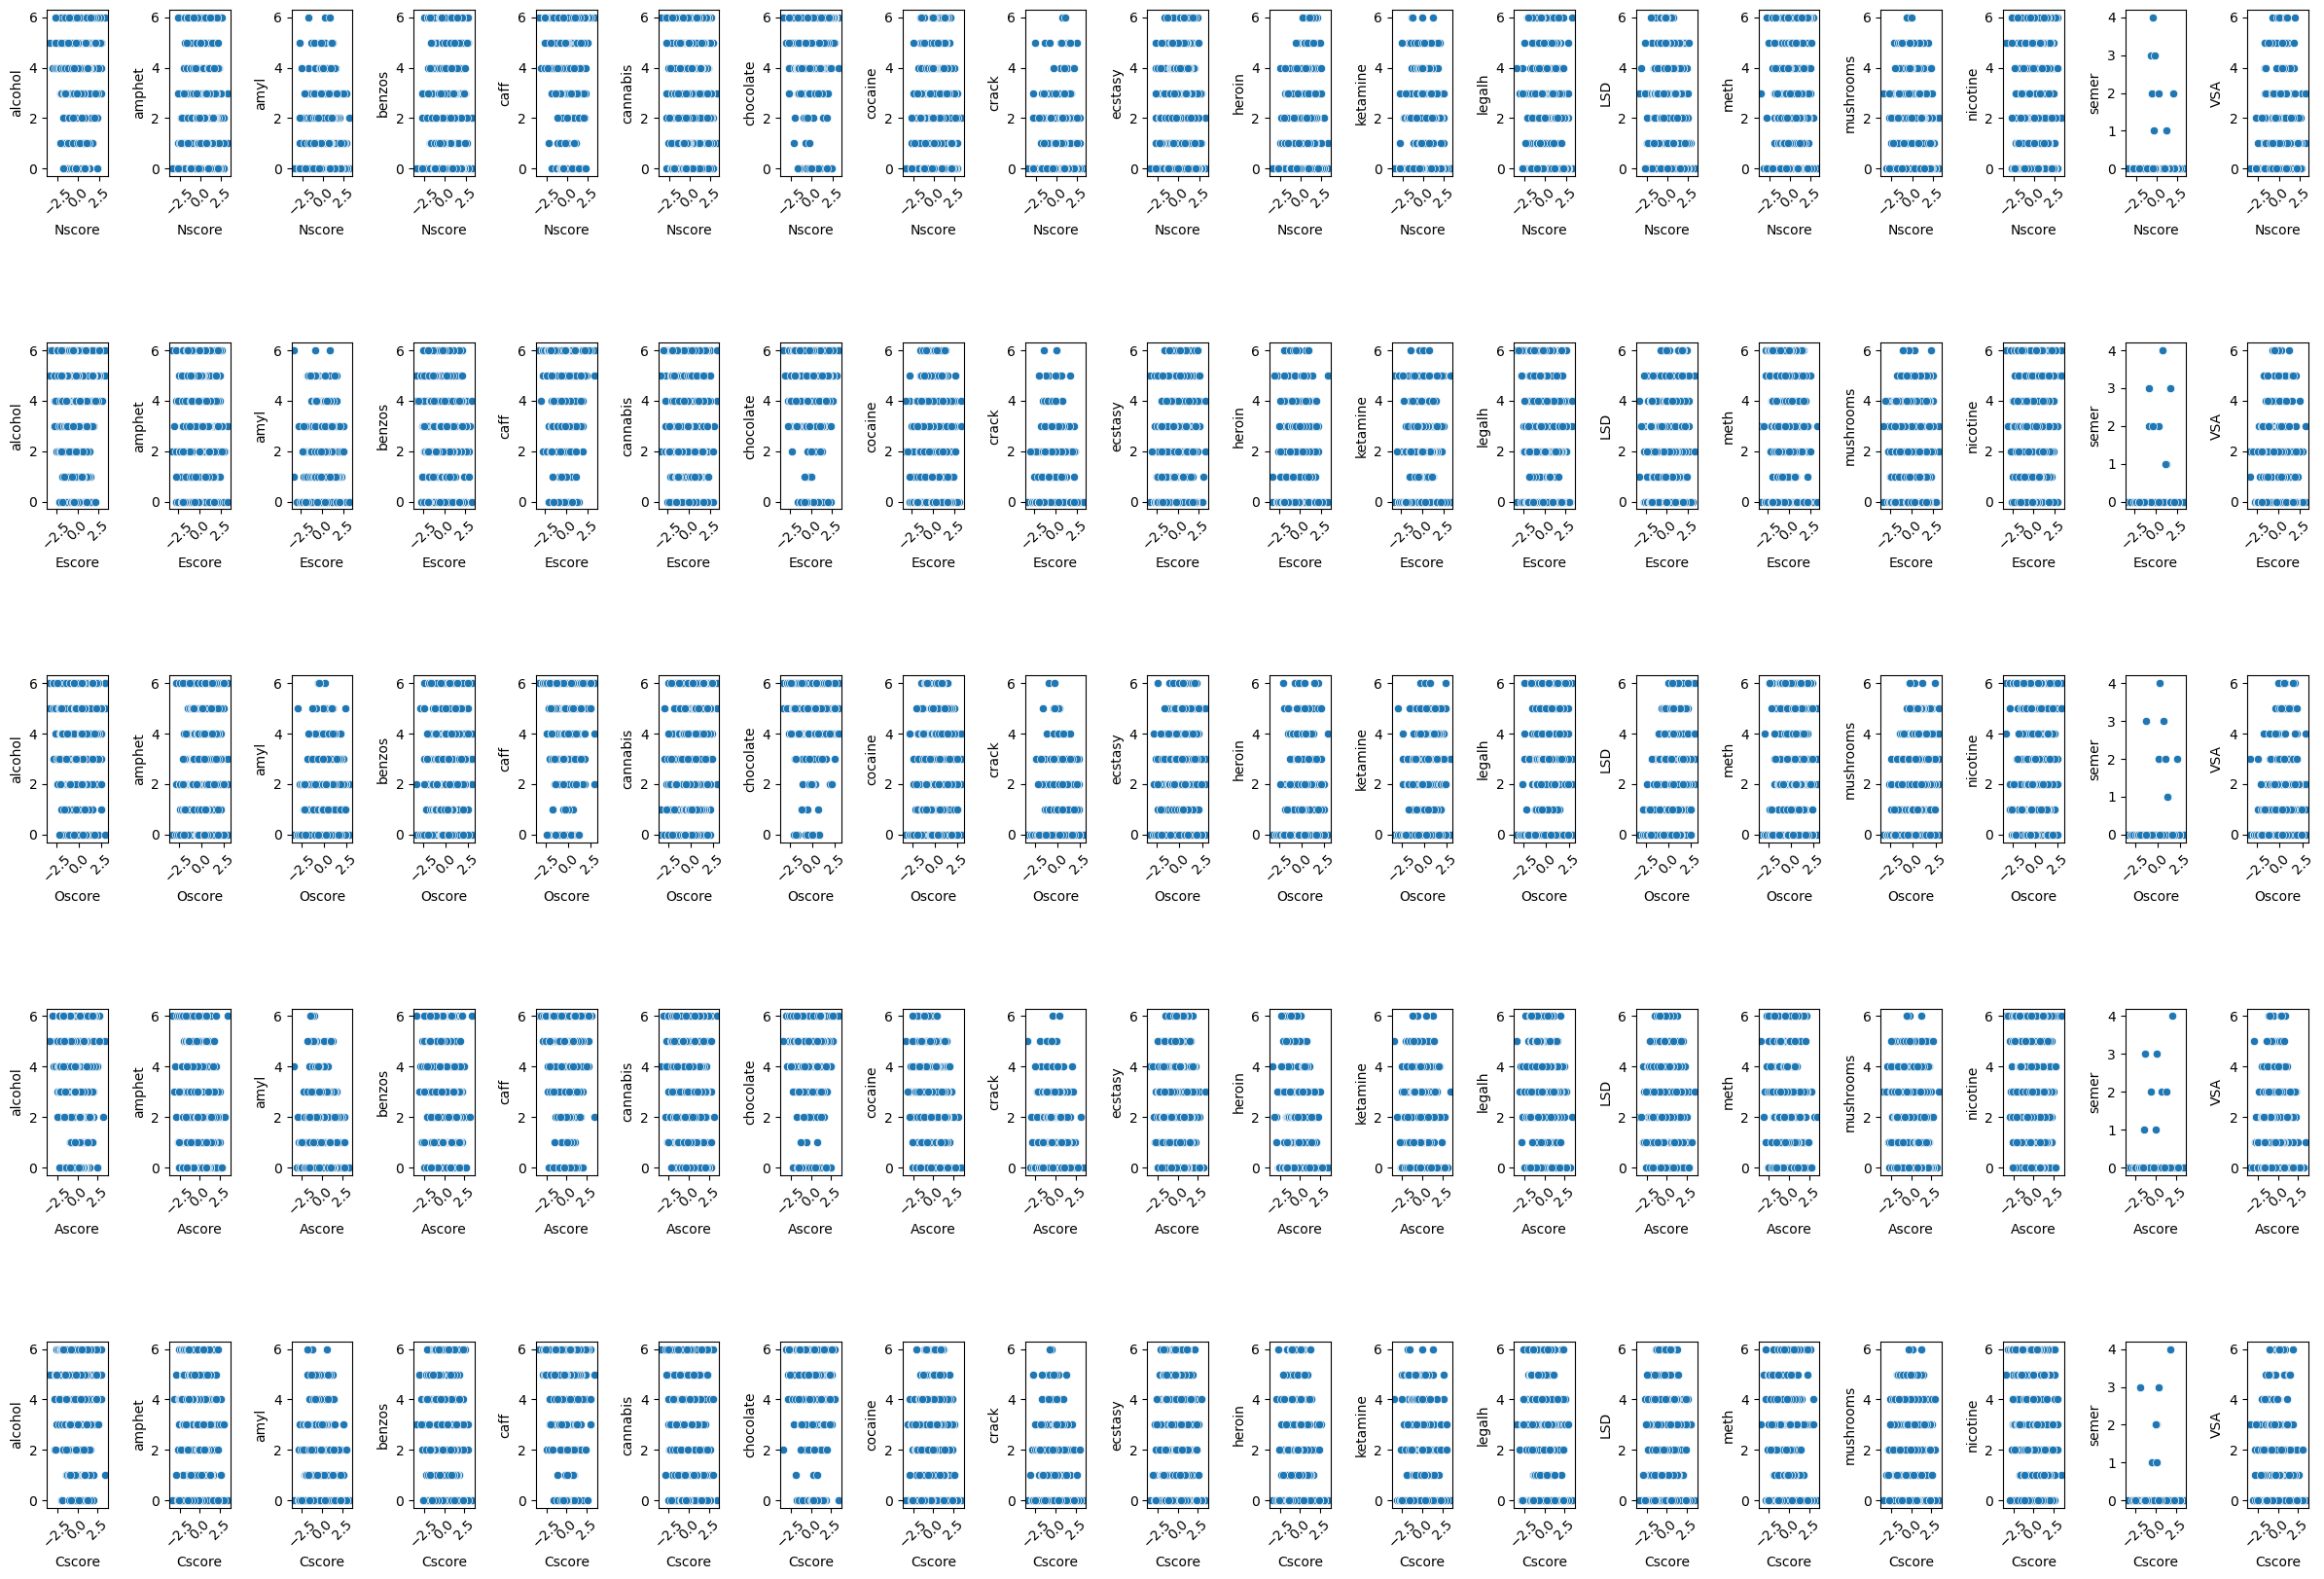

In [14]:
import seaborn as sns

df = df_drug

# Define the list of personality score columns
personality_scores = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']

# Define the list of drug columns
drug_columns = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'chocolate', 'cocaine',
                'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'LSD', 'meth', 'mushrooms',
                'nicotine', 'semer', 'VSA']

# Create subplots for personality scores vs. each drug
fig, axes = plt.subplots(nrows=len(personality_scores), ncols=len(drug_columns), figsize=(30, 20))
fig.subplots_adjust(wspace=1, hspace=1)

for i, personality_score in enumerate(personality_scores):
    for j, drug in enumerate(drug_columns):
        sns.scatterplot(x=personality_score, y=drug, data=df, ax=axes[i, j])
        #axes[i, j].set_title(f'{personality_score} vs {drug}', fontsize=8)
        axes[i, j].set_xlabel(personality_score)
        axes[i, j].set_ylabel(drug)
        axes[i, j].tick_params(axis='x', labelrotation=45)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

def perform_logistic_regression(df, columns, threshold=3):
    results = []

    for column in columns:
        # Create a subset where the drug value is greater than or equal to the threshold
        df_sub = df[df[column] >= threshold]

        X = df_sub[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore', 'age', 'sex']]
        y = df_sub[column]

        # Ensure there are at least two classes in the target variable
        if len(y.unique()) > 1:
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

            # Create a Logistic Regression model
            model = LogisticRegression(multi_class='auto', solver='liblinear')

            # Fit the model on the training data
            model.fit(X_train, y_train)

            # Make predictions on the testing data
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            confusion_mat = confusion_matrix(y_test, y_pred)

            # Store the results in a dictionary
            result = {
                'Column': column,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1,
                'Confusion Matrix': confusion_mat
            }
            results.append(result)
        else:
            print(f"Not enough classes in {column} with drug value >= {threshold}")

    return results

# Call the function with your DataFrame and list of columns
results = perform_logistic_regression(df_drug, ls_drugs, threshold=3)

# Print the results for each column
for result in results:
    print(f"Logistic Regression for Column: {result['Column']}")
    print("Accuracy:", result['Accuracy'])
    print("Precision:", result['Precision'])
    print("Recall:", result['Recall'])
    print("F1 Score:", result['F1 Score'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print()


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import pandas as pd

def perform_logistic_regression(df, columns, threshold=3):
    all_results = []

    for column in columns:
        # Create a subset where the drug value is greater than or equal to the threshold
        df_sub = df[df[column] >= threshold]

        X = df_sub[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore', 'age', 'sex']]
        y = df_sub[column]

        # Ensure there are at least two classes in the target variable
        if len(y.unique()) > 1:
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

            # Create a Logistic Regression model
            model = LogisticRegression(multi_class='auto', solver='liblinear')

            # Fit the model on the training data
            model.fit(X_train, y_train)

            # Make predictions on the testing data
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            confusion_mat = confusion_matrix(y_test, y_pred)

            # Calculate percentages
            total_samples = len(y_test)
            accuracy_percentage = (accuracy * 100)
            precision_percentage = (precision * 100)
            recall_percentage = (recall * 100)
            f1_percentage = (f1 * 100)

            # Store the results in a dictionary
            result = {
                'Column': column,
                'Accuracy (%)': accuracy_percentage,
                'Precision (%)': precision_percentage,
                'Recall (%)': recall_percentage,
                'F1 Score (%)': f1_percentage,
            }
            all_results.append(result)
        else:
            print(f"Not enough classes in {column} with drug value >= {threshold}")

    # Create a DataFrame from the results
    results_df = pd.DataFrame(all_results)

    return results_df

# Call the function with your DataFrame and list of columns
results_df = perform_logistic_regression(df_drug, ls_drugs, threshold=3)

# Print the results DataFrame
(results_df)

,Column,Accuracy (%),Precision (%),Recall (%),F1 Score (%)
0,alcohol,46.885813,37.889848,46.885813,37.985453
1,amphet,47.222222,47.596154,47.222222,36.710295
2,amyl,70.454545,79.183884,70.454545,58.242424
3,benzos,39.548023,32.276890,39.548023,32.263241
4,caff,75.083056,81.291597,75.083056,64.397612
5,cannabis,44.242424,62.664680,44.242424,30.392078
6,chocolate,42.927632,51.328641,42.927632,36.746237
7,cocaine,58.695652,51.039003,58.695652,44.490768
8,crack,77.777778,84.541063,77.777778,81.018519
9,ecstasy,50.292398,56.873940,50.292398,34.661306


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

def perform_logistic_regression(df, columns, threshold=3):
    all_results = []

    for column in columns:
        # Create a subset where the drug value is greater than or equal to the threshold
        df_sub = df[df[column] >= threshold]

        X = df_sub[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']]
        y = df_sub[column]

        # Ensure there are at least two classes in the target variable
        if len(y.unique()) > 1:
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

            # Create a Logistic Regression model
            model = LogisticRegression(multi_class='auto', solver='liblinear')

            # Fit the model on the training data
            model.fit(X_train, y_train)

            # Make predictions on the testing data
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            confusion_mat = confusion_matrix(y_test, y_pred)

            # Calculate percentages
            total_samples = len(y_test)
            accuracy_percentage = (accuracy * 100)
            precision_percentage = (precision * 100)
            recall_percentage = (recall * 100)
            f1_percentage = (f1 * 100)

            # Cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            cross_val_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

            # Get feature importance (coefficients)
            feature_importance = model.coef_[0]  # assuming binary classification, change accordingly for multiclass

            # Store the results in a dictionary
            result = {
                'Column': column,
                'Accuracy (%)': accuracy_percentage,
                'Precision (%)': precision_percentage,
                'Recall (%)': recall_percentage,
                'F1 Score (%)': f1_percentage,
                'Cross-Val Accuracy': cross_val_results.mean(),
                'Feature Importance (Nscore)': feature_importance[0],
                'Feature Importance (Ascore)': feature_importance[1],
                'Feature Importance (Cscore)': feature_importance[2],
                'Feature Importance (Escore)': feature_importance[3],
                'Feature Importance (Oscore)': feature_importance[4]
            }
            all_results.append(result)
        else:
            print(f"Not enough classes in {column} with drug value >= {threshold}")

    # Create a DataFrame from the results
    results_df = pd.DataFrame(all_results)

    return results_df

# Call the function with your DataFrame and list of columns
results_df = perform_logistic_regression(df_drug, ls_drugs, threshold=3)

# Print the results DataFrame


# Print correlation matrices
for column in ls_drugs:
    df_sub = df_drug[df_drug[column] >= 3]
    correlation_matrix = df_sub[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']].corr()
    print(f"\nCorrelation Matrix for {column} (Drug Value >= 3):\n")
    print(correlation_matrix)


/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Correlation Matrix for alcohol (Drug Value >= 3):

          Nscore    Ascore    Cscore    Escore    Oscore
Nscore  1.000000 -0.210523 -0.379090 -0.422298  0.020003
Ascore -0.210523  1.000000  0.242653  0.157302  0.030118
Cscore -0.379090  0.242653  1.000000  0.299157 -0.064640
Escore -0.422298  0.157302  0.299157  1.000000  0.255142
Oscore  0.020003  0.030118 -0.064640  0.255142  1.000000

Correlation Matrix for amphet (Drug Value >= 3):

          Nscore    Ascore    Cscore    Escore    Oscore
Nscore  1.000000 -0.212743 -0.419365 -0.433783 -0.132041
Ascore -0.212743  1.000000  0.181717  0.159032  0.205472
Cscore -0.419365  0.181717  1.000000  0.266063  0.148685
Escore -0.433783  0.159032  0.266063  1.000000  0.341769
Oscore -0.132041  0.205472  0.148685  0.341769  1.000000

Correlation Matrix for amyl (Drug Value >= 3):

          Nscore    Ascore    Cscore    Escore    Oscore
Nscore  1.000000 -0.097609 -0.361107 -0.414439  0.015451
Ascore -0.097609  1.000000  0.139137  0.145030  0.

/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
(results_df)

,Column,Accuracy (%),Precision (%),Recall (%),F1 Score (%),Cross-Val Accuracy,Feature Importance (Nscore),Feature Importance (Ascore),Feature Importance (Cscore),Feature Importance (Escore),Feature Importance (Oscore)
0,alcohol,44.290657,29.281356,44.290657,32.130783,0.430523,-0.153767,-0.050975,-0.106647,-0.404583,-0.012827
1,amphet,47.222222,54.250356,47.222222,35.257822,0.451803,-0.028086,0.217305,0.066953,-0.089094,0.219954
2,amyl,70.454545,79.183884,70.454545,58.242424,0.684330,0.571651,0.027452,0.130931,0.417316,0.054807
3,benzos,41.242938,30.257779,41.242938,32.406453,0.441121,-0.400080,0.139662,0.085490,0.049156,0.083627
4,caff,75.083056,81.291597,75.083056,64.397612,0.759321,-0.361110,0.014686,-0.130916,-0.299941,-0.024789
5,cannabis,44.545455,61.729798,44.545455,29.620793,0.472472,0.191660,0.120345,0.117593,0.049409,-0.455823
6,chocolate,42.927632,51.916090,42.927632,36.980226,0.436957,-0.027868,0.058177,-0.103149,-0.068489,0.084937
7,cocaine,59.420290,51.216545,59.420290,44.835310,0.618703,-0.373940,0.005688,-0.119886,-0.240466,0.331891
8,crack,88.888889,89.173789,88.888889,87.145969,0.734167,-0.436944,0.533338,-0.205242,0.216591,0.248120
9,ecstasy,50.877193,75.149639,50.877193,34.941230,0.524122,0.159080,0.192427,-0.016270,0.064720,-0.089919


In [ ]:
x = results_df[results_df['Column'] == 'caff']

x

,Column,Accuracy (%),Precision (%),Recall (%),F1 Score (%),Cross-Val Accuracy,Feature Importance (Nscore),Feature Importance (Ascore),Feature Importance (Cscore),Feature Importance (Escore),Feature Importance (Oscore)
4,caff,75.083056,81.291597,75.083056,64.397612,0.759321,-0.36111,0.014686,-0.130916,-0.299941,-0.024789


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X and y are your feature matrix and target variable
X = df[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']]
y = df['crack']  # Replace 'target_variable' with the actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth = 5)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted', zero_division=1)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')
confusion_mat_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Print evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)
print("Confusion Matrix:")
print(confusion_mat_decision_tree)


Decision Tree Classifier:
Accuracy: 0.8523274478330658
Precision: 0.8573650665844056
Recall: 0.8523274478330658
F1 Score: 0.7968855063001259
Confusion Matrix:
[[531   8   0   0   0   0   0]
 [ 16   0   0   0   0   0   0]
 [ 41   1   0   0   0   0   0]
 [ 19   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0]]


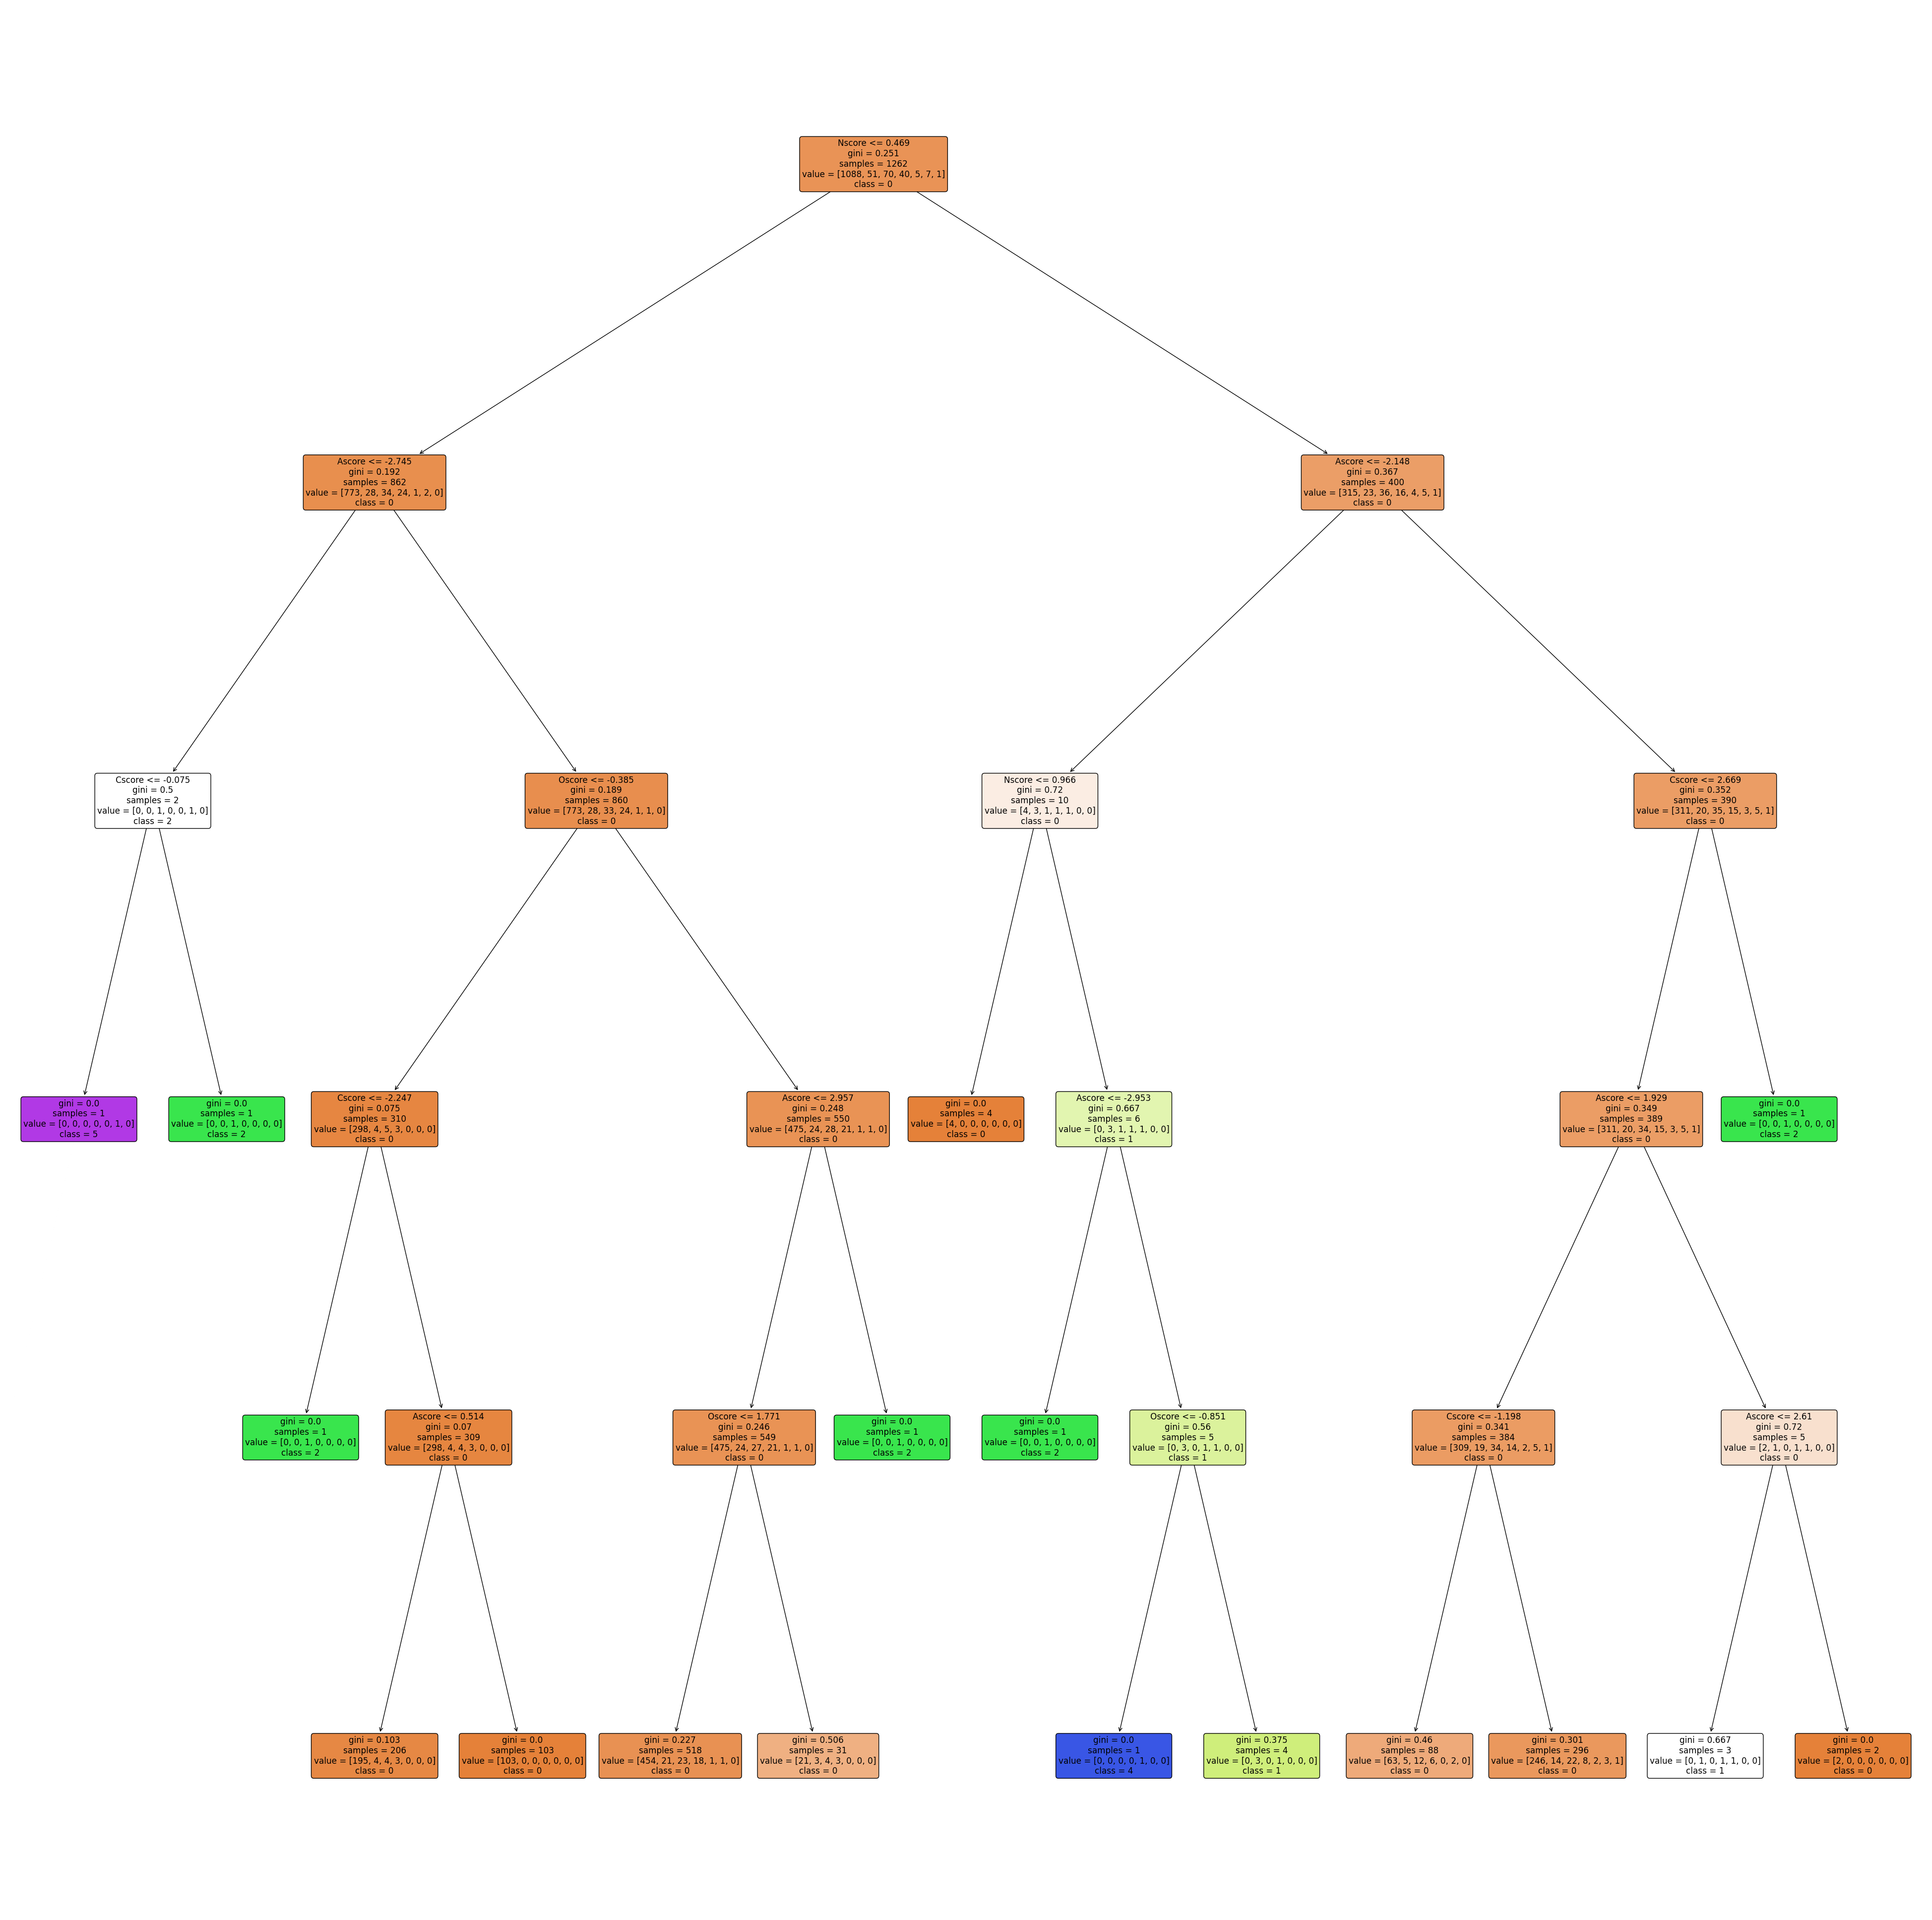

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the actual class names from your dataset
class_names = ['0', '1', '2', '3', '4', '5', '6']  # Replace with your actual class names

# Visualize the Decision Tree
plt.figure(figsize=(50, 50))
plot_tree(decision_tree_model, feature_names=['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore'], class_names=class_names, filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average='weighted', zero_division=1)
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')
confusion_mat_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Print evaluation metrics
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)
print("Confusion Matrix:")
print(confusion_mat_random_forest)



Random Forest Classifier:
Accuracy: 0.8603531300160514
Precision: 0.8571014342670741
Recall: 0.8603531300160514
F1 Score: 0.8002249129916337
Confusion Matrix:
[[536   3   0   0   0   0   0]
 [ 16   0   0   0   0   0   0]
 [ 42   0   0   0   0   0   0]
 [ 19   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Select relevant columns
personality_features = ['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']
drug_columns = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'chocolate', 'cocaine',
                'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'LSD', 'meth', 'mushrooms',
                'nicotine', 'semer', 'VSA']
for drug in drug_columns:
    # Filter columns where the value is 4 or above for the current drug
    filtered_data = df[df[drug] >= 4]

    # Check if there are enough samples for splitting
    if len(filtered_data) < 2:
        print(f"Not enough samples for {drug}. Skipping.")
        continue

    # Select relevant features and target
    X = filtered_data[personality_features]
    y = filtered_data[drug]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Print a classification report for the current drug
    print(f"Classification Report for {drug}:")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("="*50)

Classification Report for alcohol:
              precision    recall  f1-score   support

         4.0       0.21      0.17      0.19        59
         5.0       0.53      0.65      0.58       161
         6.0       0.27      0.20      0.23        91

    accuracy                           0.42       311
   macro avg       0.34      0.34      0.33       311
weighted avg       0.39      0.42      0.40       311

Classification Report for amphet:
              precision    recall  f1-score   support

         4.0       0.47      0.41      0.44        22
         5.0       0.25      0.25      0.25        12
         6.0       0.18      0.21      0.19        14

    accuracy                           0.31        48
   macro avg       0.30      0.29      0.29        48
weighted avg       0.33      0.31      0.32        48

Classification Report for amyl:
              precision    recall  f1-score   support

         4.0       0.75      0.86      0.80         7
         5.0       0.00     

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Select relevant columns
personality_features = ['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore', 'age', 'sex']
drug_columns = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'chocolate', 'cocaine',
                'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'LSD', 'meth', 'mushrooms',
                'nicotine', 'semer', 'VSA']

# Create an empty dataframe to store results
results_df = pd.DataFrame(columns=['Drug', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over drug columns
for drug in drug_columns:
    print(f"\nProcessing {drug}...")

    # Filter columns where the value is 4 or above for the current drug
    filtered_data = df[df[drug] >= 4]

    # Check if there are enough samples for splitting
    if len(filtered_data) < 2:
        print(f"Not enough samples for {drug}. Skipping.")
        continue

    # Select relevant features and target
    X = filtered_data[personality_features]
    y = filtered_data[drug]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
    decision_tree_model.fit(X_train, y_train)
    y_pred_decision_tree = decision_tree_model.predict(X_test)

    results_df = results_df.append({
        'Drug': drug,
        'Model': 'Decision Tree',
        'Accuracy': accuracy_score(y_test, y_pred_decision_tree),
        'Precision': precision_score(y_test, y_pred_decision_tree, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred_decision_tree, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_decision_tree, average='weighted')
    }, ignore_index=True)

    # Random Forest model
    random_forest_model = RandomForestClassifier(random_state=42)
    random_forest_model.fit(X_train, y_train)
    y_pred_random_forest = random_forest_model.predict(X_test)

    results_df = results_df.append({
        'Drug': drug,
        'Model': 'Random Forest',
        'Accuracy': accuracy_score(y_test, y_pred_random_forest),
        'Precision': precision_score(y_test, y_pred_random_forest, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred_random_forest, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_random_forest, average='weighted')
    }, ignore_index=True)

    # K-Nearest Neighbors model
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)

    results_df = results_df.append({
        'Drug': drug,
        'Model': 'K-Nearest Neighbors',
        'Accuracy': accuracy_score(y_test, y_pred_knn),
        'Precision': precision_score(y_test, y_pred_knn, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred_knn, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_knn, average='weighted')
    }, ignore_index=True)

# Display the results dataframe
print("\nResults DataFrame:")
results_df



Processing alcohol...

Processing amphet...

Processing amyl...

Processing benzos...


/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Processing caff...

Processing cannabis...

Processing chocolate...

Processing cocaine...

Processing crack...

Processing ecstasy...


/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Processing heroin...

Processing ketamine...

Processing legalh...


/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Processing LSD...

Processing meth...

Processing mushrooms...


/Users/sahanadhar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Processing nicotine...

Processing semer...
Not enough samples for semer. Skipping.

Processing VSA...

Results DataFrame:


,Drug,Model,Accuracy,Precision,Recall,F1 Score
0,alcohol,Decision Tree,0.454936,0.392657,0.454936,0.415137
1,alcohol,Random Forest,0.457082,0.408704,0.457082,0.416598
2,alcohol,K-Nearest Neighbors,0.437768,0.410914,0.437768,0.418699
3,amphet,Decision Tree,0.402778,0.508887,0.402778,0.360465
4,amphet,Random Forest,0.361111,0.380806,0.361111,0.320747
5,amphet,K-Nearest Neighbors,0.333333,0.315715,0.333333,0.317761
6,amyl,Decision Tree,0.461538,0.638462,0.461538,0.529915
7,amyl,Random Forest,0.692308,0.747253,0.692308,0.703846
8,amyl,K-Nearest Neighbors,0.461538,0.415385,0.461538,0.437247
9,benzos,Decision Tree,0.366667,0.367138,0.366667,0.355684


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Select relevant columns
personality_features = ['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']
drug_columns = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'chocolate', 'cocaine',
                'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'LSD', 'meth', 'mushrooms',
                'nicotine', 'semer', 'VSA']

# Create an empty dataframe to store feature importances
feature_importance_df = pd.DataFrame(columns=['Drug', 'Model', 'Feature', 'Importance'])

# Iterate over drug columns
for drug in drug_columns:
    print(f"\nProcessing {drug}...")

    # Filter columns where the value is 4 or above for the current drug
    filtered_data = df[df[drug] >= 4]

    # Check if there are enough samples for splitting
    if len(filtered_data) < 2:
        print(f"Not enough samples for {drug}. Skipping.")
        continue

    # Select relevant features and target
    X = filtered_data[personality_features]
    y = filtered_data[drug]

    # Split the data into training and testing sets
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    # Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
    decision_tree_model.fit(X_train, y_train)

    # Get feature importances
    feature_importances_dt = decision_tree_model.feature_importances_
    for feature, importance in zip(personality_features, feature_importances_dt):
        feature_importance_df = feature_importance_df.append({
            'Drug': drug,
            'Model': 'Decision Tree',
            'Feature': feature,
            'Importance': importance
        }, ignore_index=True)

    # Random Forest model
    random_forest_model = RandomForestClassifier(random_state=42)
    random_forest_model.fit(X_train, y_train)

    # Get feature importances
    feature_importances_rf = random_forest_model.feature_importances_
    for feature, importance in zip(personality_features, feature_importances_rf):
        feature_importance_df = feature_importance_df.append({
            'Drug': drug,
            'Model': 'Random Forest',
            'Feature': feature,
            'Importance': importance
        }, ignore_index=True)

    """# Logistic Regression model
    logistic_regression_model = LogisticRegression(random_state=42)
    logistic_regression_model.fit(X_train, y_train)

    # Get feature coefficients (importances)
    feature_importances_lr = logistic_regression_model.coef_[0]
    for feature, importance in zip(personality_features, feature_importances_lr):
        feature_importance_df = feature_importance_df.append({
            'Drug': drug,
            'Model': 'Logistic Regression',
            'Feature': feature,
            'Importance': importance
        }, ignore_index=True)"""

# Display the feature importance dataframe
print("\nFeature Importance DataFrame:")
feature_importance_df.head(60)



Processing alcohol...

Processing amphet...

Processing amyl...

Processing benzos...

Processing caff...

Processing cannabis...

Processing chocolate...

Processing cocaine...

Processing crack...

Processing ecstasy...

Processing heroin...

Processing ketamine...

Processing legalh...

Processing LSD...

Processing meth...

Processing mushrooms...

Processing nicotine...

Processing semer...
Not enough samples for semer. Skipping.

Processing VSA...

Feature Importance DataFrame:


,Drug,Model,Feature,Importance
0,alcohol,Decision Tree,Nscore,0.276542
1,alcohol,Decision Tree,Ascore,0.178692
2,alcohol,Decision Tree,Cscore,0.189876
3,alcohol,Decision Tree,Escore,0.145966
4,alcohol,Decision Tree,Oscore,0.208924
5,alcohol,Random Forest,Nscore,0.210448
6,alcohol,Random Forest,Ascore,0.200145
7,alcohol,Random Forest,Cscore,0.205113
8,alcohol,Random Forest,Escore,0.188006
9,alcohol,Random Forest,Oscore,0.196288


In [ ]:
feature_importance_df[70:100]

,Drug,Model,Feature,Importance
70,cocaine,Decision Tree,Nscore,0.356883
71,cocaine,Decision Tree,Ascore,0.169938
72,cocaine,Decision Tree,Cscore,0.190117
73,cocaine,Decision Tree,Escore,0.209180
74,cocaine,Decision Tree,Oscore,0.073883
75,cocaine,Random Forest,Nscore,0.229283
76,cocaine,Random Forest,Ascore,0.179723
77,cocaine,Random Forest,Cscore,0.196222
78,cocaine,Random Forest,Escore,0.203302
79,cocaine,Random Forest,Oscore,0.191471


In [ ]:
feature_importance_df[120:150]

,Drug,Model,Feature,Importance
120,legalh,Decision Tree,Nscore,0.264069
121,legalh,Decision Tree,Ascore,0.293190
122,legalh,Decision Tree,Cscore,0.071563
123,legalh,Decision Tree,Escore,0.111651
124,legalh,Decision Tree,Oscore,0.259527
125,legalh,Random Forest,Nscore,0.195101
126,legalh,Random Forest,Ascore,0.226550
127,legalh,Random Forest,Cscore,0.189464
128,legalh,Random Forest,Escore,0.199676
129,legalh,Random Forest,Oscore,0.189209


In [ ]:
feature_importance_df[150:180]

,Drug,Model,Feature,Importance
150,mushrooms,Decision Tree,Nscore,0.214791
151,mushrooms,Decision Tree,Ascore,0.326825
152,mushrooms,Decision Tree,Cscore,0.120465
153,mushrooms,Decision Tree,Escore,0.255255
154,mushrooms,Decision Tree,Oscore,0.082664
155,mushrooms,Random Forest,Nscore,0.198128
156,mushrooms,Random Forest,Ascore,0.218440
157,mushrooms,Random Forest,Cscore,0.199468
158,mushrooms,Random Forest,Escore,0.196610
159,mushrooms,Random Forest,Oscore,0.187354
